# Pymaceuticals Inc.
---

### Analysis

-Very minor differences in affect from Men and Women from the use of the drugs
-The Distribution of the tumor volume was greater in the Infubinor and the Certamin than in Capomuin and Ramicane
-The tumor volume for mouse l509 did apprear to make an impact in volume at 35. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results,mouse_metadata, how= "left")

# Display the data table for preview
combined_data.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice= len(combined_data["Mouse ID"].unique())
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

# Printing the duplicate Mouse IDs
print(duplicate_mice_ids)



['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. **** the first used on the duplicate per g989
# dup_mice_id = pd.DataFrame(duplicate_mice)
# dup_mice_id 
combined_data.loc[combined_data["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data.loc[combined_data["Mouse ID"] != "g989", :]
cleaned_df.head()
   


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_count= len(cleaned_df["Mouse ID"].unique())
cleaned_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_name_grouped= cleaned_df.groupby("Drug Regimen")
drug_name_grouped
ss_mean= drug_name_grouped["Tumor Volume (mm3)"].mean()
ss_median = drug_name_grouped["Tumor Volume (mm3)"].median()
ss_variance = drug_name_grouped["Tumor Volume (mm3)"].var()
ss_std = drug_name_grouped["Tumor Volume (mm3)"].std()
ss_SEM = drug_name_grouped["Tumor Volume (mm3)"].sem()
Summary_statistics = pd.DataFrame({"Mean Tumor Volume":ss_mean, 
                                   "Median Tumor Volume": ss_median, 
                                   "Tumor Volume Variance":ss_variance, 
                                   "Tumor Volume Std. Dev.": ss_std, 
                                   "Tumor Volume Std. Err.": ss_SEM})

Summary_statistics
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_name_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

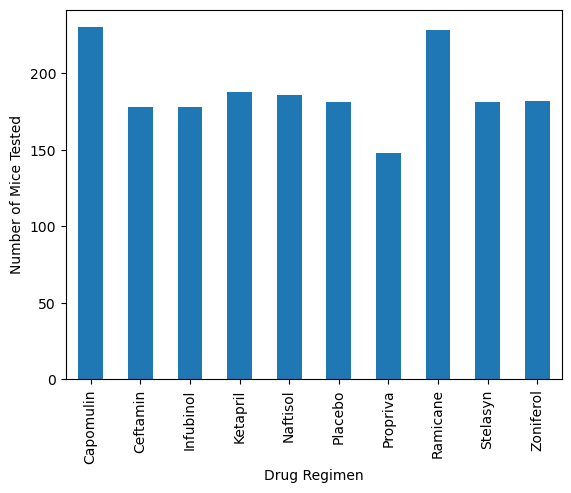

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# for each drug get the total count of timepoints 
timpoint_counts = drug_name_grouped["Timepoint"].count()
# df = pd.DataFrame(timpoint_counts)
ax = timpoint_counts.plot.bar(x ='Drug Regimen', y = "Timepoint", rot=90)

# # Set chart title and axis labels
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')

# # Show the chart
plt.show()


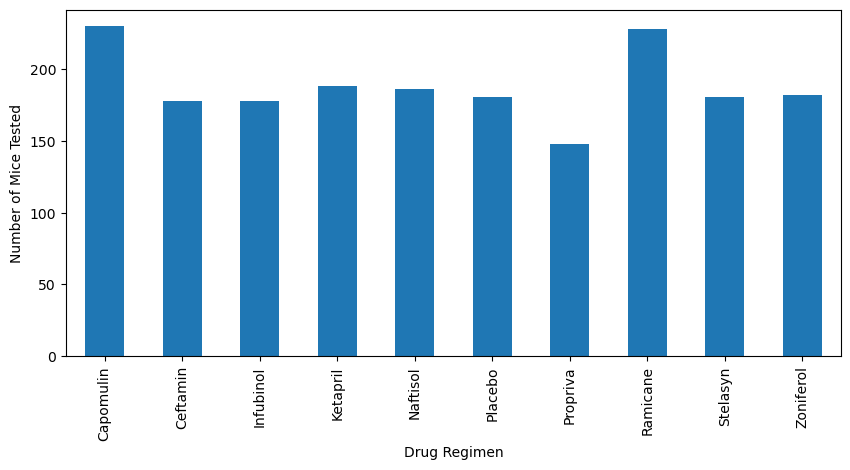

<Figure size 640x480 with 0 Axes>

In [61]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timpoint_counts.plot(kind="bar", figsize=(10,4.5))
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()


<Axes: ylabel='Sex'>

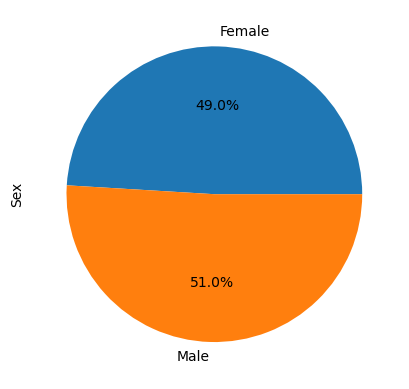

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_dist = cleaned_df.groupby("Sex")["Sex"].count()
Gender_dist.plot.pie(y=Gender_dist, labels=["Female", "Male"], autopct='%1.1f%%')
# Gender_dist


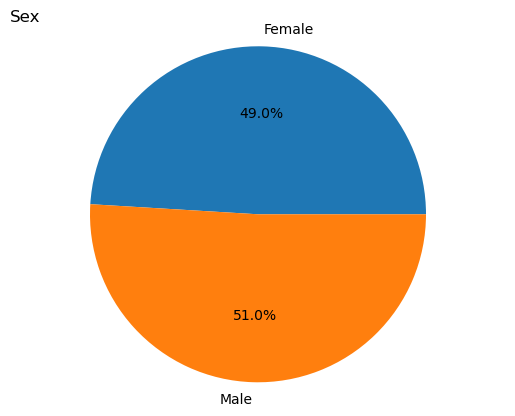

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
Gender_dist = cleaned_df.groupby("Sex")["Sex"].count()
plt.title("Sex", loc= "left")
Gender = ["Female","Male"]
plt.pie(Gender_dist, labels= Gender,
        autopct="%1.1f%%", startangle=00)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_timepoint= cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby("Mouse ID")["Timepoint"].max()
final_timepoint = final_timepoint.to_frame()

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = cleaned_df.merge(final_timepoint, on=["Mouse ID", "Timepoint"])
# cleaned_df[cleaned_df["Mouse ID"]== "x336"]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
#   loop through the final_tumor_volume to return each treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#   Tumor value to the list 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume[final_tumor_volume["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    # print(tumor_volumes)       
    # add subset 
    data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # print(f"The lower quartile of occupancy is: {lowerq}")
    # print(f"The upper quartile of occupancy is: {upperq}")
    # print(f"The interquartile range of occupancy is: {iqr}")
    # print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
     
    # print(lower_bound)
    # print(upper_bound) 
    outlier_occupancy = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outlier_occupancy

    print(f"{treatment}'s potential outliers: {outlier_occupancy}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

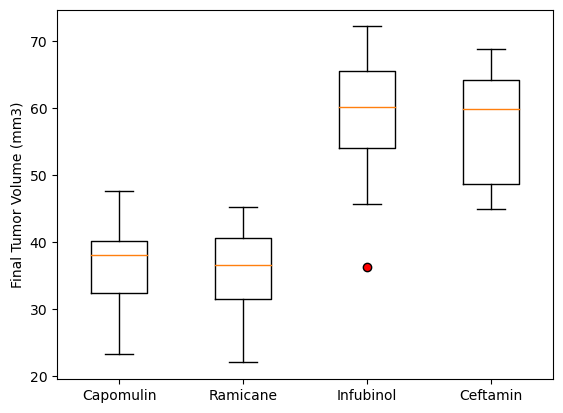

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
plt.boxplot(data,flierprops=flierprops,labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')


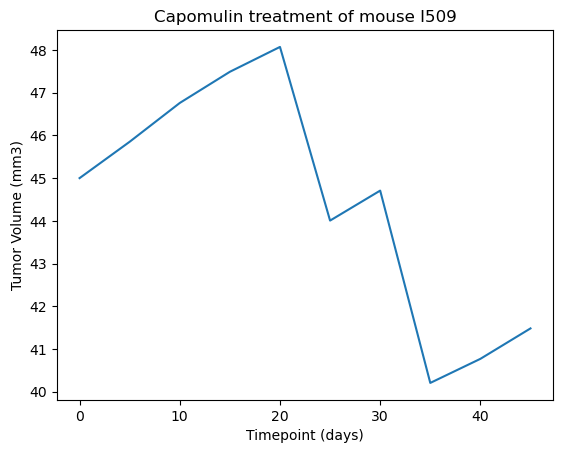

In [23]:
# # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_l509 = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 'l509')]

timepoint = capomulin_l509['Timepoint']
tumor_volume = capomulin_l509['Tumor Volume (mm3)']

plt.plot(timepoint,tumor_volume)

plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

C:\Users\rober\AppData\Local\Temp\ipykernel_28392\3498412759.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_regimen.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

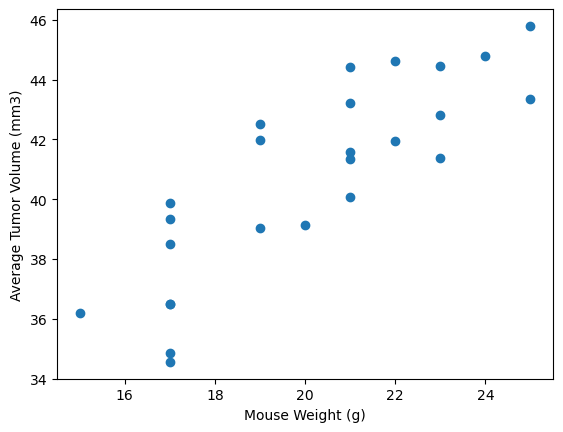

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin')]
capomulin_average = capomulin_regimen.groupby(['Mouse ID']).mean()
plt.scatter(x=capomulin_average['Weight (g)'], y=capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#print(avg_tumor_vol)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


Text(0, 0.5, 'Average Tumor Volume (mm3)')

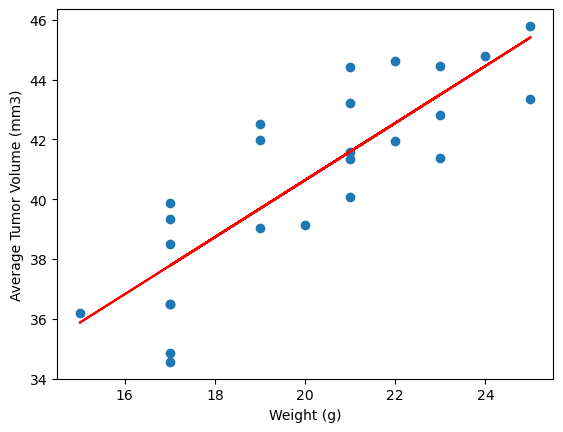

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_weight = capomulin_average['Weight (g)']
avg_tumor_vol=capomulin_average['Tumor Volume (mm3)']

correlation = np.corrcoef(avg_weight, avg_tumor_vol)[0,1]

# Calculate linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(avg_weight, avg_tumor_vol)
regress_values = slope * avg_weight + intercept

print('The correlation between mouse weight and the average tumor volume is', correlation)
# Create scatter plot of tumor volume vs. mouse weight with linear regression line
plt.scatter(avg_weight, avg_tumor_vol)
plt.plot(avg_weight, regress_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')